In [1]:
import torch
import torchvision
from torch import nn
from torchvision import transforms
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image 
import numpy as np
import importlib
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.preprocessing import StandardScaler
import scipy.io as io




In [2]:
seen_dataset = io.loadmat('matlab_dataset/insect_dataset.mat') 
all_dna_features_cnn_new = seen_dataset['all_dna_features_cnn_original']
all_image_features_gan = seen_dataset['all_image_features_resnet']
train_loc = np.squeeze(seen_dataset['train_loc']-1)
val_seen_loc = np.squeeze(seen_dataset['val_seen_loc']-1)
val_unseen_loc = np.squeeze(seen_dataset['val_unseen_loc']-1)
test_seen_loc = np.squeeze(seen_dataset['test_seen_loc']-1)
test_unseen_loc = np.squeeze(seen_dataset['test_unseen_loc']-1)
expanded_train_dna_features = torch.tensor(all_dna_features_cnn_new[train_loc])
expanded_val_dna_features = torch.tensor(all_dna_features_cnn_new[np.concatenate((val_seen_loc,val_unseen_loc))])
expanded_trainval_dna_features = torch.tensor(all_dna_features_cnn_new[np.concatenate((train_loc,val_seen_loc,val_unseen_loc))])
expanded_test_dna_features = torch.tensor(all_dna_features_cnn_new[np.concatenate((test_seen_loc,test_unseen_loc))])

image_train_features = torch.tensor(all_image_features_gan[train_loc])
image_val_features = torch.tensor(all_image_features_gan[np.concatenate((val_seen_loc,val_unseen_loc))])
image_test_features = torch.tensor(all_image_features_gan[np.concatenate((test_seen_loc,test_unseen_loc))])

all_labels = seen_dataset['all_labels'].squeeze()-1

image_train_labels = torch.tensor(all_labels[train_loc])
image_val_labels= torch.tensor(all_labels[np.concatenate((val_seen_loc,val_unseen_loc))])
image_trainval_labels= torch.tensor(all_labels[np.concatenate((train_loc,val_seen_loc,val_unseen_loc))])
image_test_labels= torch.tensor(all_labels[np.concatenate((test_seen_loc,test_unseen_loc))])

described_species_train = seen_dataset['described_species_labels_train'].squeeze()-1
described_species_trainval = seen_dataset['described_species_labels_trainval'].squeeze()-1

species2genus = seen_dataset['species2genus'].squeeze()-1

In [3]:
raise Exception
is_train_val = True # USE TRUE HERE IF ITS THE FINAL EVALUATION AND YOU WANT TO TRAIN ON TRAIN+VAL AND EVALUATE ON TEST
complete_train_features = torch.cat((expanded_train_dna_features,image_train_features),dim=1)
complete_val_features = torch.cat((expanded_val_dna_features,image_val_features),dim=1)
complete_test_features = torch.cat((expanded_test_dna_features,image_test_features),dim=1)
if is_train_val:
    complete_train_features = torch.cat((complete_train_features,complete_val_features),dim=0)
    complete_val_features = complete_test_features
    image_train_labels = torch.cat((image_train_labels,image_val_labels),dim=0)
    image_val_labels = image_test_labels
    described_species_labels = described_species_trainval

scaler = StandardScaler()
complete_train_features_scaled = scaler.fit_transform(complete_train_features)
complete_val_features_scaled = scaler.transform(complete_val_features)


Exception: 

In [4]:
unseen_dataset = io.loadmat('get_unseen_fresh_samples/unseen_insect_dataset.mat')
unseen_dna_features = unseen_dataset['all_dna_features_cnn_original']
unseen_genus_labels = unseen_dataset['all_genus_labels'].squeeze()-1

In [5]:
unseen_genus_labels.shape

(40050,)

In [6]:
unseen_dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'all_images', 'all_dnas', 'all_string_dnas', 'all_genus_labels', 'all_boldids', 'all_image_features_gan', 'all_dna_features_cnn_new', 'all_image_features_resnet', 'all_dna_features_cnn_original'])

In [7]:
expanded_trainval_dna_features.shape

torch.Size([19994, 500])

In [8]:
species2genus

array([234, 234, 235, ...,  44,  44, 311])

In [9]:
unseen_dna_features.mean()

-44.40218170607411

In [10]:
expanded_train_dna_features.mean()

tensor(-50.8000, dtype=torch.float64)

# SCALING??????

In [11]:

scaler = StandardScaler()
expanded_train_dna_features = scaler.fit_transform(expanded_train_dna_features)
unseen_dna_features = scaler.transform(unseen_dna_features)

In [12]:
print(unseen_dna_features.mean())
expanded_train_dna_features.mean()

-0.08064206841561126


1.354930177309543e-17

In [14]:
print(unseen_dna_features.std())
expanded_train_dna_features.std()

6.86587070470608


0.9999999999999994

In [26]:
import pickle 
with open('get_unseen_fresh_samples/genusname2genuslabel.pickle', 'rb') as handle:
    genusname2genuslabel = pickle.load(handle)

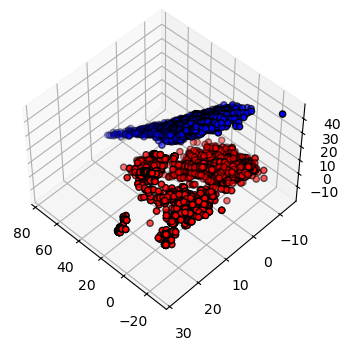

In [27]:
import matplotlib.pyplot as plt
GENUS_TO_CHECK = 100
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets, decomposition

np.random.seed(5)

y = image_train_labels
X = expanded_train_dna_features#[species2genus[y]==GENUS_TO_CHECK]#only keep Hemiceras

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
'''
for  label in [1]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        'asd'+str(label),
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="r", facecolor="w"),
    )
    '''
#y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='r', edgecolor="k")
unseenX = unseen_dna_features#[unseen_genus_labels==GENUS_TO_CHECK]
unseenX = pca.transform(unseenX)
ax.scatter(unseenX[:, 0], unseenX[:, 1], unseenX[:, 2], c='b', edgecolor="k")
plt.savefig(f"get_unseen_fresh_samples/pcas/allgenus{list(genusname2genuslabel.keys())[list(genusname2genuslabel.values()).index(GENUS_TO_CHECK)]}.png")

In [29]:
X.mean()

-9.30025003730274e-17

In [30]:
unseenX.mean()

14.135957331445479